In [132]:
import pandas, numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt

Parsing the file containing the ICMP trace. 
Using only the column containing the destination address, sequence number and RTT. 
Skipping the initial header rows and final training rows containing statistics.

In [133]:
trace = pandas.read_csv('./traces/156-1.txt', delim_whitespace=True, usecols=[3,5,10], skiprows=[0,1], skipfooter=3, header=None, names=['destination', 'seq', 'rtt'],engine='python')
print(trace[1:10])

                      destination     seq     rtt
1  2001:db8::1711:6b10:65f9:5932:   seq=2   8.490
2  2001:db8::1711:6b10:65f9:5932:   seq=3  10.090
3  2001:db8::1711:6b10:65f9:5932:   seq=4  10.730
4  2001:db8::1711:6b10:65f9:5932:   seq=5   9.450
5  2001:db8::1711:6b10:65f9:5932:   seq=6   9.136
6  2001:db8::1711:6b10:65f9:5932:   seq=7   8.811
7  2001:db8::1711:6b10:65f9:5932:   seq=8   8.177
8  2001:db8::1711:6b10:65f9:5932:   seq=9   8.811
9  2001:db8::1711:6b10:65f9:5932:  seq=10   9.770


The ICMP packets that have timed-out are not appearing properly, so we are droping them. 

In [134]:
trace = trace.dropna()

Converting the column containing the packet sequence into an integer.

In [135]:
for index, row in trace.iterrows():
    trace.at[index, 'seq'] = int(row['seq'][4:])

Making the packet sequence the main index of the Dataframe.

In [136]:
trace.index = trace['seq']
trace = trace.drop(['seq'], axis=1)

Simple plotting

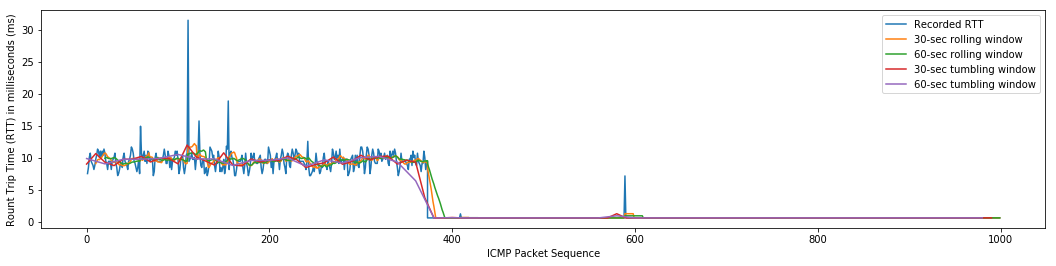

In [142]:
plt.figure(figsize=(18,4))
plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
plt.xlabel('ICMP Packet Sequence')
plt.plot(trace['rtt'], label='Recorded RTT')
plt.plot(trace['rtt'].rolling(10).mean(), label='30-sec rolling window')
plt.plot(trace['rtt'].rolling(20).mean(), label='60-sec rolling window')
plt.plot(trace.groupby(trace.index // 10 * 10).mean(), label='30-sec tumbling window')
plt.plot(trace.groupby(trace.index // 20 * 20).mean(), label='60-sec tumbling window')
plt.legend()